In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
b = a.T.Nueces[a.columns[1:]]

In [5]:
a.T.Nueces

Unnamed: 0                                   †
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-7      58
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-8      57
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-9      58
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-10     58
                                          ... 
Active Cases 06-08                          94
Active Cases 06-09                          97
Active Cases 06-10                          95
Active Cases 06-11                         102
Active Cases 06-12                         113
Name: Nueces, Length: 68, dtype: object

In [6]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [8]:
c = dated_df.set_index('Date')

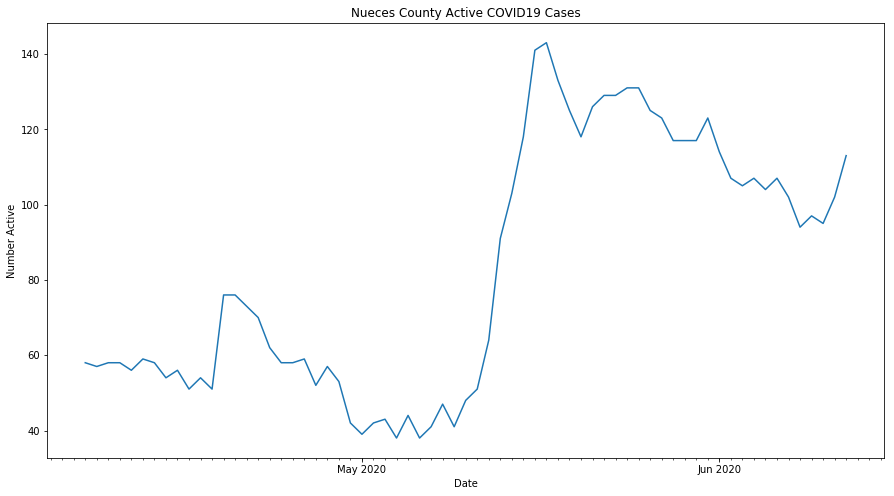

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Nueces County Active COVID19 Cases')
plt.savefig('NuecesActive.png')

In [10]:
x = c.diff(periods = 1)

In [11]:
x

,Active Cases
Date,
2020-04-07,NaN
2020-04-08,-1.0
2020-04-09,1.0
2020-04-10,0.0
2020-04-11,-2.0
...,...
2020-06-08,-8.0
2020-06-09,3.0
2020-06-10,-2.0


In [12]:
x.rename(columns={'Active Cases':'Change In Active Cases'}, inplace = True)

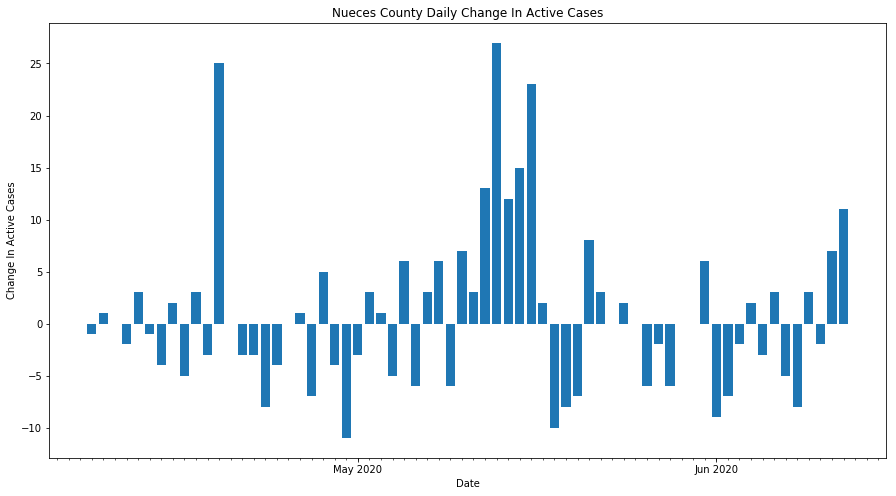

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Nueces County Daily Change In Active Cases')
plt.bar(x.index,x['Change In Active Cases'])
fig.savefig('NuecesChangeInActiveCases.png')